# Bigram_LM

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import bigrams
import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [69]:
myfile = open('taleof2cities.txt', 'r').read()
len(myfile)

776625

In [70]:
your_corpus = PlaintextCorpusReader('C:\\Users\\Dell\\NLP\\2_Python_Pandas\\100_Applied_NLP\\taleof2cities.txt', '.*' )


In [71]:
type(your_corpus)

nltk.corpus.reader.plaintext.PlaintextCorpusReader

In [83]:
#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in your_corpus.sents('.')[:5000]:
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model




In [84]:
def predict_next_word(first_word):
    #buikd the model
    model = build_bigram_model()
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)


    predicted_words = list(zip(*top10words))[0]
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))

    # calculate slope and intercept for the linear trend line
    slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.title('Predicted words for ' + first_word)
    plt.show()

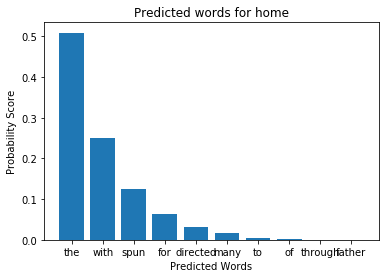

In [85]:
predict_next_word('home')

## Code Break Analysis

In [86]:
collections.defaultdict(lambda: 0)

defaultdict(<function __main__.<lambda>()>, {})

In [91]:
bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
bigram_model

defaultdict(<function __main__.<lambda>()>, {})

In [93]:
type(bigram_model)

collections.defaultdict

In [94]:
for sentence in your_corpus.sents('.')[:5000]:
    sentence = [word.lower() for word in sentence if word.isalpha()]
    print(sentence)
    break

['the', 'project', 'gutenberg', 'ebook', 'of', 'a', 'tale', 'of', 'two', 'cities', 'by', 'charles', 'dickens']


In [98]:
count = 0
for w1, w2 in bigrams(sentence):
    bigram_model[w1][w2] += 1
    count += 1
    print(bigram_model)
    if count == 4:
        break

defaultdict(<function <lambda> at 0x000000001493FB70>, {'the': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675378>, {'project': 3}), 'project': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675510>, {'gutenberg': 1})})
defaultdict(<function <lambda> at 0x000000001493FB70>, {'the': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675378>, {'project': 3}), 'project': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675510>, {'gutenberg': 2})})
defaultdict(<function <lambda> at 0x000000001493FB70>, {'the': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675378>, {'project': 3}), 'project': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675510>, {'gutenberg': 2}), 'gutenberg': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014294620>, {'ebook': 1})})
defaultdict(<function <lambda> at 0x000000001493FB70>, {'the': defaultdict(<function <lambda>.<locals>.<lambda> at 0x00000000146

In [99]:
for w1 in bigram_model:
    #total count of bigrams starting with w1
    bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
    print(bigram_count_4_w1)

3.0
2.0
1.0
1.0


In [108]:
for w2 in bigram_model[w1]:
    bigram_model[w1][w2] /= bigram_count_4_w1
    print(bigram_model)

defaultdict(<function <lambda> at 0x000000001493FB70>, {'the': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675378>, {'project': 3}), 'project': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014675510>, {'gutenberg': 2}), 'gutenberg': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014294620>, {'ebook': 1}), 'ebook': defaultdict(<function <lambda>.<locals>.<lambda> at 0x0000000014294488>, {'of': 1.0})})


In [109]:
bigram_model[w1][w2]

1.0